## Exploring the Data

In [3]:
import pandas as pd
import geopandas as gpd

#override max columns displayed
pd.set_option('display.max_columns', None)


In [217]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
path = '../data/consolidated/'
weather_data = pd.read_csv(path+'consolidated_weather_from_centroids.csv')
columns = list(weather_data.columns)
columns[0] = 'Hour'
weather_data.columns = columns

In [219]:
weather_data.head()

,Hour,valid_time,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file
0,0,2003-01-01 00:00:00,4.169555700,-1.214157100,259.068600000,262.640500000,0.000000000,0.000001907,48.750000000,-82.000000000,Northeast_centroid_weather
1,1,2003-01-01 01:00:00,4.098358000,-1.437255900,259.248540000,262.533800000,0.000000000,0.000000954,48.750000000,-82.000000000,Northeast_centroid_weather
2,2,2003-01-01 02:00:00,4.197708000,-1.892501800,258.542540000,261.637120000,0.000000000,0.000003815,48.750000000,-82.000000000,Northeast_centroid_weather
3,3,2003-01-01 03:00:00,3.741165200,-2.575897200,255.868730000,258.893980000,0.000000000,0.000008583,48.750000000,-82.000000000,Northeast_centroid_weather
4,4,2003-01-01 04:00:00,3.124801600,-2.671005200,255.429030000,258.673280000,0.000000000,0.000009537,48.750000000,-82.000000000,Northeast_centroid_weather


Checking if the centroids fall in the shape map.

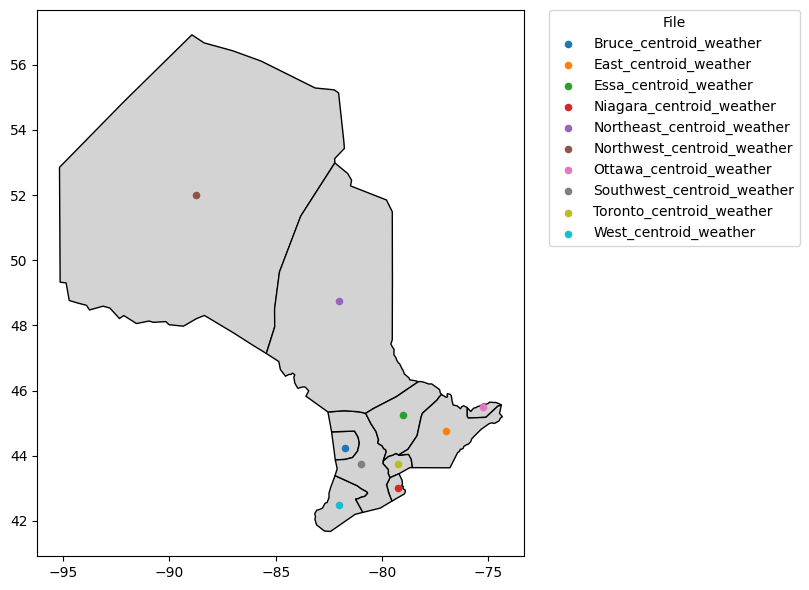

In [5]:
import matplotlib.pyplot as plt
import geopandas as gpd

# read data
shapemap = gpd.read_file('../data/tenzones_ieso.geojson')
centroids = weather_data[['longitude', 'latitude', 'file']].drop_duplicates()

fig, ax = plt.subplots(figsize=(8, 6))

# plot map
shapemap.plot(ax=ax, color='lightgrey', edgecolor='black')

# plot centroids by file
for file_name, group in centroids.groupby('file'):
    ax.scatter(
        group['longitude'],
        group['latitude'],
        s=20,
        label=file_name
    )

# legend **outside** to the right
ax.legend(
    title="File",
    bbox_to_anchor=(1.05, 1),   # x, y position relative to the axes
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()


In [6]:
# now read demand data
demand_data = pd.read_csv(path+'consolidatedIESOdemand.csv')
demand_data.head()

/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_5895/3917683950.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  demand_data = pd.read_csv(path+'consolidatedIESOdemand.csv')


,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year
0,2003-05-01,1,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163,2003
1,2003-05-01,2,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100,2003
2,2003-05-01,3,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123,2003
3,2003-05-01,4,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89,2003
4,2003-05-01,5,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78,2003


In [7]:
demand_data.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year
0,2003-05-01,1,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163,2003
1,2003-05-01,2,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100,2003
2,2003-05-01,3,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123,2003
3,2003-05-01,4,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89,2003
4,2003-05-01,5,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78,2003


Now for the price data

In [8]:
price_data = pd.read_csv(path+'prices_zonal.csv')

In [224]:
%pip install duckdb

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Data Cleaning and Feature Engineering

In [9]:
# convert fromm kelvin to celsius
weather_data['temp_C_t2m'] = weather_data['t2m'] - 273.15

In [10]:
# show average temperatures
pd.set_option('display.float_format', lambda x: '%.9f' % x)
weather_data['temp_C_t2m'].describe()

count   2004720.000000000
mean          6.662419457
std          11.948470872
min         -45.063900000
25%          -1.136880000
50%           7.163570000
75%          16.441212500
max          37.167720000
Name: temp_C_t2m, dtype: float64

In [11]:
import sys
import importlib

sys.path.append('../scripts/')
import FeatureEngineering
importlib.reload(FeatureEngineering)

dataset = FeatureEngineering.CleanedDataset(weather_data, demand_data, price_data)

In [12]:
datamerged = dataset.merge_datasets()
datamerged.sort_values(by=['file', 'Date']).head(5)

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file,temp_C_t2m,Hour_of_Day,Reference_Richview,North West_Atikokan,North West_Pineportage,North West_Thunderbay,North East_Andrews,North East_Canyon,North East_NPIroqfalls,Ottawa_TAOHSC,East_Saunders,Toronto_Darlington,Essa_Desjoachims,Bruce_BruceB,South West_GerdauCam,Niagara_BECK2,West_Greenfield
1223417,2004-01-01 00:00:00,1,14703,811,1406,1197,903,4606,859,53,2790,542,1670,14837,134,2004,10.436722000,-2.628097500,268.592960000,274.277950000,0.000000000,0.000000954,44.250000000,-81.750000000,Bruce_centroid_weather,1.127950000,1,31.910000000,23.100000000,19.840000000,22.920000000,23.810000000,27.390000000,27.630000000,32.240000000,30.640000000,31.260000000,29.200000000,30.340000000,30.610000000,31.260000000,30.670000000
1223418,2004-01-01 01:00:00,2,14130,805,1412,1095,889,4366,794,53,2698,516,1603,14231,101,2004,10.491440000,-3.361358600,268.799200000,274.068400000,0.000000000,0.000004768,44.250000000,-81.750000000,Bruce_centroid_weather,0.918400000,2,29.550000000,21.390000000,18.370000000,21.230000000,22.040000000,25.360000000,25.590000000,29.850000000,28.380000000,28.950000000,27.040000000,28.100000000,28.340000000,28.950000000,28.400000000
1223419,2004-01-01 02:00:00,3,13575,795,1358,1053,842,4188,747,50,2582,507,1553,13675,100,2004,9.877060000,-4.244293000,269.045650000,274.056100000,0.000000000,0.000012398,44.250000000,-81.750000000,Bruce_centroid_weather,0.906100000,3,27.680000000,20.040000000,17.210000000,19.890000000,20.650000000,23.760000000,23.970000000,27.970000000,26.580000000,27.120000000,25.330000000,26.320000000,26.550000000,27.120000000,26.610000000
1223420,2004-01-01 03:00:00,4,13280,789,1355,1027,817,4046,718,52,2549,517,1512,13382,102,2004,8.785461000,-4.654403700,269.179720000,274.193270000,0.000000000,0.000010490,44.250000000,-81.750000000,Bruce_centroid_weather,1.043270000,4,25.520000000,18.470000000,15.870000000,18.340000000,19.040000000,21.910000000,22.100000000,25.790000000,24.510000000,25.000000000,23.350000000,24.260000000,24.480000000,25.000000000,24.530000000
1223421,2004-01-01 04:00:00,5,13219,779,1354,1018,811,3974,709,50,2534,529,1501,13259,40,2004,7.959579500,-4.542907700,269.336730000,274.298160000,0.000000000,0.000006199,44.250000000,-81.750000000,Bruce_centroid_weather,1.148160000,5,24.750000000,17.910000000,15.390000000,17.780000000,18.460000000,21.240000000,21.430000000,25.000000000,23.770000000,24.250000000,22.650000000,23.530000000,23.740000000,24.250000000,23.790000000


In [13]:
# Quick missing data check
print(f"Merged dataset shape: {datamerged.shape}")
print(f"Missing values by column:")
missing = datamerged.isnull().sum()
for col in missing[missing > 0].index:
    pct = (missing[col] / len(datamerged) * 100)
    print(f"  {col}: {missing[col]:,} ({pct:.1f}%)")
if missing.sum() == 0:
    print("  No missing values found!")

Merged dataset shape: (1905110, 42)
Missing values by column:
  Hour_of_Day: 36,710 (1.9%)
  Reference_Richview: 36,720 (1.9%)
  North West_Atikokan: 36,720 (1.9%)
  North West_Pineportage: 36,720 (1.9%)
  North West_Thunderbay: 421,530 (22.1%)
  North East_Andrews: 36,720 (1.9%)
  North East_Canyon: 36,720 (1.9%)
  North East_NPIroqfalls: 36,720 (1.9%)
  Ottawa_TAOHSC: 36,720 (1.9%)
  East_Saunders: 36,720 (1.9%)
  Toronto_Darlington: 36,720 (1.9%)
  Essa_Desjoachims: 36,720 (1.9%)
  Bruce_BruceB: 36,720 (1.9%)
  South West_GerdauCam: 36,740 (1.9%)
  Niagara_BECK2: 36,720 (1.9%)
  West_Greenfield: 36,720 (1.9%)


In [14]:



# Check different types of missing values
empty_strings = datamerged[datamerged['North West_Thunderbay'] == '']


null_values = datamerged[datamerged['North West_Thunderbay'].isnull()]['Date'].dt.year.unique()

# null_values = datamerged[datamerged['North West_Thunderbay'].isnull()].index.year.nunique()



null_values

array([2016, 2021, 2020, 2022, 2023, 2024, 2025], dtype=int32)

Thunder

In [15]:
null_values

array([2016, 2021, 2020, 2022, 2023, 2024, 2025], dtype=int32)

In [16]:
# # make sure that date is unique
# # show non unique dates
# merged_data = dataset.merge_datasets()
# non_unique_dates = merged_data[merged_data.duplicated(subset=['Date'], keep=False)]
# non_unique_dates

In [17]:
datamerged.sort_values(by=['file', 'Date']).head(24)

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file,temp_C_t2m,Hour_of_Day,Reference_Richview,North West_Atikokan,North West_Pineportage,North West_Thunderbay,North East_Andrews,North East_Canyon,North East_NPIroqfalls,Ottawa_TAOHSC,East_Saunders,Toronto_Darlington,Essa_Desjoachims,Bruce_BruceB,South West_GerdauCam,Niagara_BECK2,West_Greenfield
1223417,2004-01-01 00:00:00,1,14703,811,1406,1197,903,4606,859,53,2790,542,1670,14837,134,2004,10.436722000,-2.628097500,268.592960000,274.277950000,0.000000000,0.000000954,44.250000000,-81.750000000,Bruce_centroid_weather,1.127950000,1,31.910000000,23.100000000,19.840000000,22.920000000,23.810000000,27.390000000,27.630000000,32.240000000,30.640000000,31.260000000,29.200000000,30.340000000,30.610000000,31.260000000,30.670000000
1223418,2004-01-01 01:00:00,2,14130,805,1412,1095,889,4366,794,53,2698,516,1603,14231,101,2004,10.491440000,-3.361358600,268.799200000,274.068400000,0.000000000,0.000004768,44.250000000,-81.750000000,Bruce_centroid_weather,0.918400000,2,29.550000000,21.390000000,18.370000000,21.230000000,22.040000000,25.360000000,25.590000000,29.850000000,28.380000000,28.950000000,27.040000000,28.100000000,28.340000000,28.950000000,28.400000000
1223419,2004-01-01 02:00:00,3,13575,795,1358,1053,842,4188,747,50,2582,507,1553,13675,100,2004,9.877060000,-4.244293000,269.045650000,274.056100000,0.000000000,0.000012398,44.250000000,-81.750000000,Bruce_centroid_weather,0.906100000,3,27.680000000,20.040000000,17.210000000,19.890000000,20.650000000,23.760000000,23.970000000,27.970000000,26.580000000,27.120000000,25.330000000,26.320000000,26.550000000,27.120000000,26.610000000
1223420,2004-01-01 03:00:00,4,13280,789,1355,1027,817,4046,718,52,2549,517,1512,13382,102,2004,8.785461000,-4.654403700,269.179720000,274.193270000,0.000000000,0.000010490,44.250000000,-81.750000000,Bruce_centroid_weather,1.043270000,4,25.520000000,18.470000000,15.870000000,18.340000000,19.040000000,21.910000000,22.100000000,25.790000000,24.510000000,25.000000000,23.350000000,24.260000000,24.480000000,25.000000000,24.530000000
1223421,2004-01-01 04:00:00,5,13219,779,1354,1018,811,3974,709,50,2534,529,1501,13259,40,2004,7.959579500,-4.542907700,269.336730000,274.298160000,0.000000000,0.000006199,44.250000000,-81.750000000,Bruce_centroid_weather,1.148160000,5,24.750000000,17.910000000,15.390000000,17.780000000,18.460000000,21.240000000,21.430000000,25.000000000,23.770000000,24.250000000,22.650000000,23.530000000,23.740000000,24.250000000,23.790000000
1223422,2004-01-01 05:00:00,6,13354,776,1351,1034,829,3966,716,52,2551,531,1509,13315,-39,2004,8.172653000,-3.857940700,269.578670000,274.278600000,0.000000000,0.000021935,44.250000000,-81.750000000,Bruce_centroid_weather,1.128600000,6,31.130000000,22.540000000,19.350000000,22.370000000,23.230000000,26.720000000,26.960000000,31.450000000,29.890000000,30.500000000,28.490000000,29.600000000,29.870000000,30.500000000,29.920000000
1223423,2004-01-01 06:00:00,7,13462,777,1339,1067,862,4023,742,57,2587,455,1531,13440,-22,2004,8.050049000,-3.897705000,269.640720000,274.337700000,0.000000000,0.000021458,44.250000000,-81.750000000,Bruce_centroid_weather,1.187700000,7,32.870000000,23.800000000,20.440000000,23.620000000,24.530000000,28.220000000,28.470000000,33.220000000,31.570000000,32.210000000,30.080000000,31.260000000,31.540000000,32.210000000,31.600000000
1223424,2004-01-01 07:00:00,8,13538,756,1334,1135,857,4082,774,58,2623,460,1557,13636,98,2004,7.448654000,-4.284515400,269.600280000,274.449400000,0.000000000,0.000009060,44.250000000,-81.750000000,Bruce_centroid_weather,1.299400000,8,21.250000000,15.380000000,13.210000000,15.270000000,15.860000000,18.240000000,18.400000000,21.470000000,20.410000000,20.820000000,19.440000000,20.210000000,20.390000000,20.820000000,20.430000000
1223425,2004-01-01 08:00:00,9,13675,764,1347,1216,842,4112,813,58,2665,454,1555,13826,15

Test to ensure every day has a full 24 hours.

In [234]:
# merged_data['date_only'] = merged_data['Date'].dt.date

# hours_per_day = merged_data.groupby('date_only')['Date'].count()

# incomplete_days = hours_per_day[hours_per_day < 24]
# incomplete_days

In [18]:
# show average load over time
datamerged['Toronto'].describe()

count   1905110.000000000
mean       5799.795471128
std        1028.799832882
min           0.000000000
25%        5004.000000000
50%        5803.000000000
75%        6478.000000000
max       10285.000000000
Name: Toronto, dtype: float64

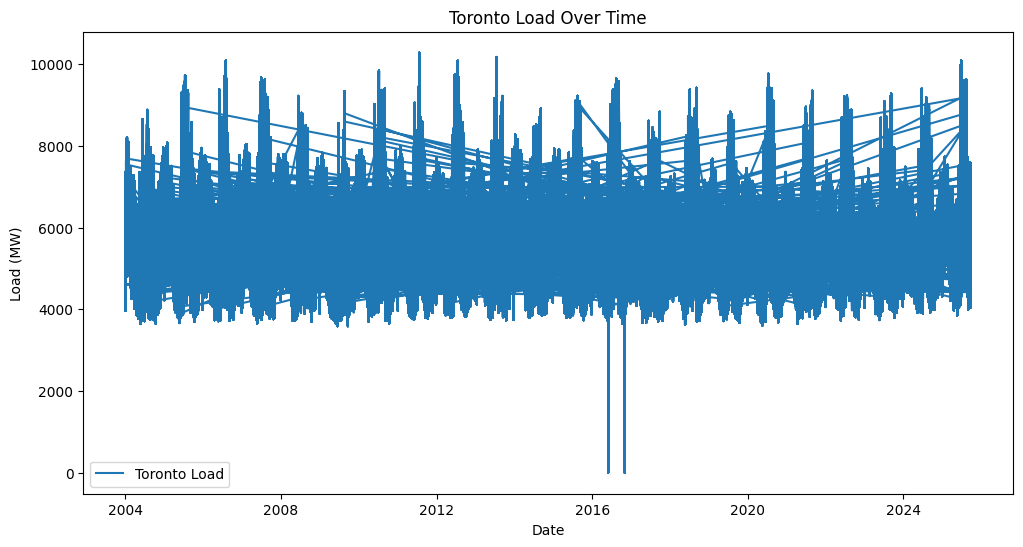

In [19]:
# graph the average prices over time
plt.figure(figsize=(12, 6))
plt.plot(datamerged['Date'], datamerged['Toronto'], label='Toronto Load')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.title('Toronto Load Over Time')
plt.legend()
plt.show()

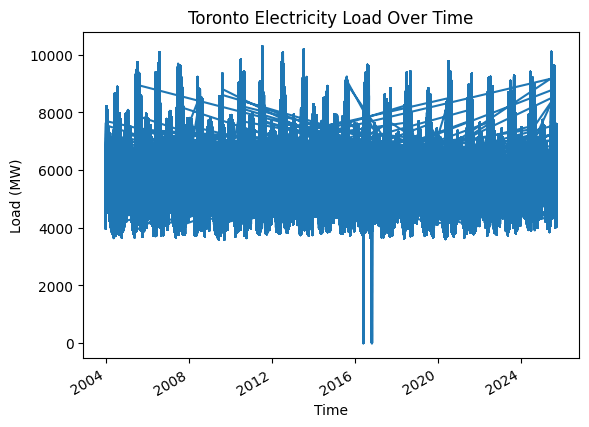

In [20]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# extract the series
prices = datamerged['Toronto']


# datamerged['Date'] = pd.to_datetime(datamerged['Date'])
datamerged.set_index('Date', inplace=True)
loads = datamerged['Toronto']


loads.plot(title='Toronto Electricity Load Over Time')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.show()

# 2. Autocorrelation plot to check cyclic patterns
# plot_acf(loads.dropna(), lags=180)  # Increase lags if needed
# plt.title('Autocorrelation of Toronto Electricity Load')
# plt.show()

# plt.show()


In [238]:
datamerged['Toronto'].describe()

count   1905110.000000000
mean       5799.795471128
std        1028.799832882
min           0.000000000
25%        5004.000000000
50%        5803.000000000
75%        6478.000000000
max       10285.000000000
Name: Toronto, dtype: float64

# ARIMAX Model

Building an ARIMAX (AutoRegressive Integrated Moving Average with eXogenous variables) model to predict electricity load usage using weather and demand data as exogenous features.

In [21]:
datamerged = dataset.merge_datasets()

datamerged = dataset.add_calendar_features(datamerged)
datamerged = datamerged[datamerged['file'] == 'Toronto_centroid_weather']


In [240]:
#create dummy variables for hour, month, weekday


print(datamerged.head())
print(datamerged.columns)


datamerged['Date'] = pd.to_datetime(datamerged['Date'])

# create dummy variables for hour, month, weekday
datamerged['hour'] = datamerged['Date'].dt.hour
datamerged['month'] = datamerged['Date'].dt.month
datamerged['weekday'] = datamerged['Date'].dt.weekday

# one hot
dummies = pd.get_dummies(datamerged[['hour', 'month', 'weekday']], columns=['hour', 'month', 'weekday'], prefix=['hour', 'month', 'weekday'])


datamerged = pd.concat([datamerged, dummies], axis=1)


print(datamerged.columns)

print(datamerged.filter(regex='hour_|month_|weekday_').head())

                       Date  Hour  Ontario Demand  Northwest  Northeast  \
1119113 2014-06-14 08:00:00     8           13929        455       1068   
1119114 2014-06-14 09:00:00     9           14332        472       1123   
1119115 2014-06-14 10:00:00    10           14559        487       1129   
1119116 2014-06-14 11:00:00    11           14596        439       1125   
1119117 2014-06-14 12:00:00    12           14385        401       1105   

         Ottawa  East  Toronto  Essa  Bruce  Southwest  Niagara  West  \
1119113     743   948     5128   805     81       2818      421  1387   
1119114     782   974     5371   822     79       2867      436  1379   
1119115     804   965     5517   808     80       2901      447  1362   
1119116     818   981     5560   798     78       2887      438  1361   
1119117     808   937     5548   764     77       2864      424  1341   

         Zone Total  Diff  Year         u10          v10           d2m  \
1119113       13855   -74  2014 5.52

In [22]:
datamerged.shape

(190511, 46)

In [23]:
# the range of dates we can use for training and testing. this is to stop it from taking forever.

datamerged = datamerged[
    (datamerged['Date'].dt.year >= 2018) & 
    (datamerged['Date'].dt.year <= 2024)
]


In [24]:
datamerged.shape

(61368, 46)

In [25]:
# ============================================================================
# Reusable Data Preparation Pipeline should work for all the data models
# ============================================================================

def prepare_toronto_load_data(
    datamerged,
    zone='Toronto_centroid_weather',
    weather_vars=None,
    extra_lags=None,  # list of tuples: (original_col, new_name, lag_hours)
    test_weeks=1,
    include_daily_seasonality=True
):
    """
    Prepare Toronto load data for time series modeling.
    
    parameters:
    datamerged : pd.DataFrame
        The merged dataset with all features
    zone : str
        Location identifier to filter by
    weather_vars : list, optional
        List of weather variables to use.
    extra_lags : list of tuples, optional
        Each tuple: (column_name, new_column_name, lag_hours)
    test_weeks : int
        Number of weeks for test set (default: 1 week = 168 hours)
    include_daily_seasonality : bool
        Whether to include daily sin/cos features (default: True)
    
    Returns:
    --------
    dict containing:
        - 'train': training dataset with datetime index
        - 'test': test dataset with datetime index
        - 'target_train': target variable for training
        - 'target_test': target variable for testing
        - 'exog_features': list of exogenous feature column names
        - 'toronto_data': full processed dataset
    """
    
    if weather_vars is None:
        weather_vars = ['temp_C_t2m', 'u10', 'tp']
    if extra_lags is None:
        extra_lags = []
    
    hours_per_week = 168
    
    # filter and prepare
    toronto_data = datamerged[datamerged['file'] == zone].copy()
    toronto_data['Date'] = pd.to_datetime(toronto_data['Date'])
    toronto_data = toronto_data.set_index('Date').sort_index()
    
    # time index for fourier terms
    toronto_data["t"] = np.arange(len(toronto_data))
    
    # weekly seasonality
    period_weekly = 24 * 7
    toronto_data["sin_wk"] = np.sin(2 * np.pi * toronto_data["t"] / period_weekly)
    toronto_data["cos_wk"] = np.cos(2 * np.pi * toronto_data["t"] / period_weekly)
    
    # daily seasonality 
    if include_daily_seasonality:
        toronto_data["sin_day"] = np.sin(2 * np.pi * toronto_data["t"] / 24)
        toronto_data["cos_day"] = np.cos(2 * np.pi * toronto_data["t"] / 24)
    
    # lag weather variables by 1 week
    for var in weather_vars:
        toronto_data[f'{var}_lag1w'] = toronto_data[var].shift(168)
    
    # lag extra columns by custom hours
    for col, new_name, lag_hours in extra_lags:
        toronto_data[new_name] = toronto_data[col].shift(lag_hours)
    
    # drop rows with NaN after lagging. this happens at the start sometimes.
    cols_to_check = [f'{v}_lag1w' for v in weather_vars] + ['Toronto']
    if extra_lags:
        cols_to_check += [new_name for _, new_name, _ in extra_lags]
    toronto_data = toronto_data.dropna(subset=cols_to_check)
    
    # e xtract dummy variables 
    hour_dummies = [c for c in toronto_data.columns if c.startswith('hour_')][1:]
    month_dummies = [c for c in toronto_data.columns if c.startswith('month_')][1:]
    weekday_dummies = [c for c in toronto_data.columns if c.startswith('weekday_')][1:]
    
    # bild exogenous features list ---
    seasonal_features = ["sin_wk", "cos_wk"]
    if include_daily_seasonality:
        seasonal_features += ['sin_day', 'cos_day']

    exog_features = (
        hour_dummies +
        month_dummies +
        weekday_dummies +
        [f'{v}_lag1w' for v in weather_vars] +
        seasonal_features
    )
    
    # holidays addition
    if 'IsHoliday' in toronto_data.columns:
        exog_features += ['IsHoliday']
    
    if extra_lags:
        exog_features += [new_name for _, new_name, _ in extra_lags]
    
    # train/test split
    train = toronto_data.iloc[:-hours_per_week * test_weeks]
    test = toronto_data.iloc[-hours_per_week * test_weeks:]
    
    # ensure numeric for exogenous features
    for df in [train, test]:
        df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    
    target_train = train['Toronto'].astype(float)
    target_test = test['Toronto'].astype(float)
    
    return {
        'train': train,
        'test': test,
        'target_train': target_train,
        'target_test': target_test,
        'exog_features': exog_features,
        'toronto_data': toronto_data
    }


/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_63426/576012382.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_63426/576012382.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/Users/isaacwood/Documents/School/CISC 451/IESO ML Pro

/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_63426/576012382.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_63426/576012382.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/Users/isaacwood/Documents/School/CISC 451/IESO ML Pro

Rolling ARIMAX RMSE: 824.07


/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_63426/576012382.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_63426/576012382.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/Users/isaacwood/Documents/School/CISC 451/IESO ML Pro

Rolling ARIMAX RMSE: 824.07


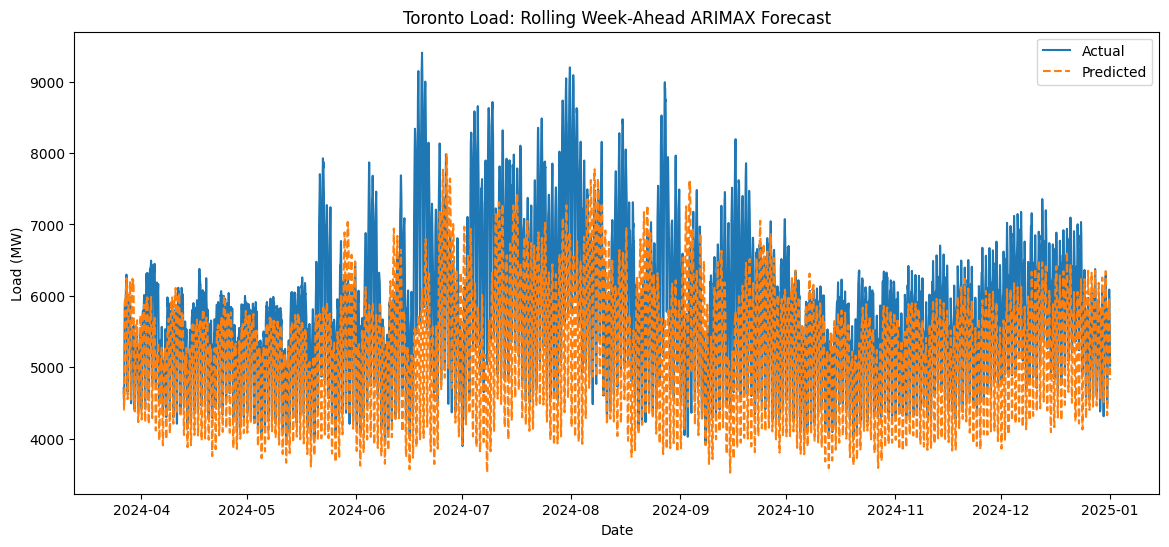

/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_63426/576012382.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_63426/576012382.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/Users/isaacwood/Documents/School/CISC 451/IESO ML Pro

Rolling ARIMAX RMSE: 824.07


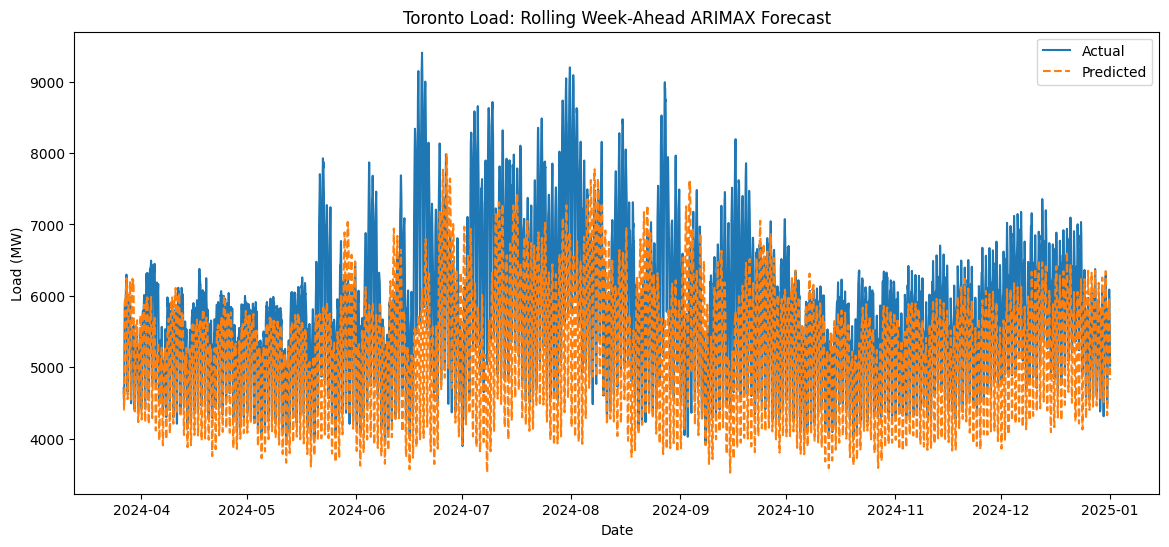

                               SARIMAX Results                                
Dep. Variable:                Toronto   No. Observations:                54480
Model:               SARIMAX(1, 1, 1)   Log Likelihood             -301168.743
Date:                Mon, 24 Nov 2025   AIC                         602443.486
Time:                        10:51:32   BIC                         602915.479
Sample:                    01-08-2018   HQIC                        602590.748
                         - 03-26-2024                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
hour_1             -21.1853      2.065    -10.261      0.000     -25.232     -17.139
hour_2             -38.0187      3.202    -11.873      0.000     -44.295     -31.743
hour_3             -50.8265 

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


data = prepare_toronto_load_data(
    datamerged,
    zone='Toronto_centroid_weather',
    weather_vars=['temp_C_t2m', 'u10', 'tp'],
    extra_lags=[
        ('Toronto', '1w_load', 168),
        ('Toronto_Darlington', '1w_price', 168)
    ],
    test_weeks=40,
    include_daily_seasonality=True
)

train = data['train']
test = data['test']
target_train = data['target_train']
target_test = data['target_test']
exog_features = data['exog_features']

# ----------------------
# Rolling week-ahead forecast
# ----------------------
forecast_horizon = 168  # 1 week
max_weeks = None       # None = forecast full test set

all_pred = []
all_actual = []

test_start_idx = 0
test_end_idx = len(test)
week_count = 0

while test_start_idx < test_end_idx:
    # Slice current week for forecast
    current_end_idx = test_start_idx + forecast_horizon
    if current_end_idx > test_end_idx:
        current_end_idx = test_end_idx  # handle last partial week

    exog_forecast = test[exog_features].iloc[test_start_idx:current_end_idx]

    # Fit ARIMAX on training data
    model = SARIMAX(
        target_train,
        exog=train[exog_features],
        order=(1, 1, 1),
        seasonal_order=(0, 0, 0, 0),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    results = model.fit(disp=False)

    # Forecast 1 week
    forecast = results.get_forecast(steps=len(exog_forecast), exog=exog_forecast)
    pred_mean = forecast.predicted_mean.values

    # Store predictions and actuals
    all_pred.extend(pred_mean)
    all_actual.extend(target_test.iloc[test_start_idx:current_end_idx].values)

    # Move to next week
    test_start_idx += forecast_horizon
    week_count += 1
    if max_weeks is not None and week_count >= max_weeks:
        break

# ----------------------
# Evaluate
# ----------------------
rmse = np.sqrt(mean_squared_error(all_actual, all_pred))
print(f'Rolling ARIMAX RMSE: {rmse:.2f}')

# ----------------------
# Plot results
# ----------------------
plt.figure(figsize=(14, 6))
plt.plot(test.index, target_test, label='Actual')
plt.plot(test.index[:len(all_pred)], all_pred, linestyle='--', label='Predicted')
plt.title('Toronto Load: Rolling Week-Ahead ARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.show()

# ----------------------
# Last model summary
# ----------------------
print(results.summary())


In [ ]:
# Create a corrupted version of test data
test_corrupted = test.copy()
test_corrupted['Toronto'] = -99999  # Impossible values


forecast1 = results.get_forecast(steps=168, exog=test[exog_features])
forecast2 = results.get_forecast(steps=168, exog=test_corrupted[exog_features])

# Check if predictions are identical
print("Predictions identical:", np.allclose(forecast1.predicted_mean, forecast2.predicted_mean))
# the predictions being identical implies that the model does not use the target variable from the test set during forecasting (eg for data leakage)

ValueError: Provided exogenous values are not of the appropriate shape. Required (168, 50), got (6720, 50).

In [247]:
# show model summary
print(rmse)

824.069711431866


## Bayesian Ridge Regression

/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_5895/576012382.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_5895/576012382.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)


Rolling Bayesian Ridge RMSE: 602.50


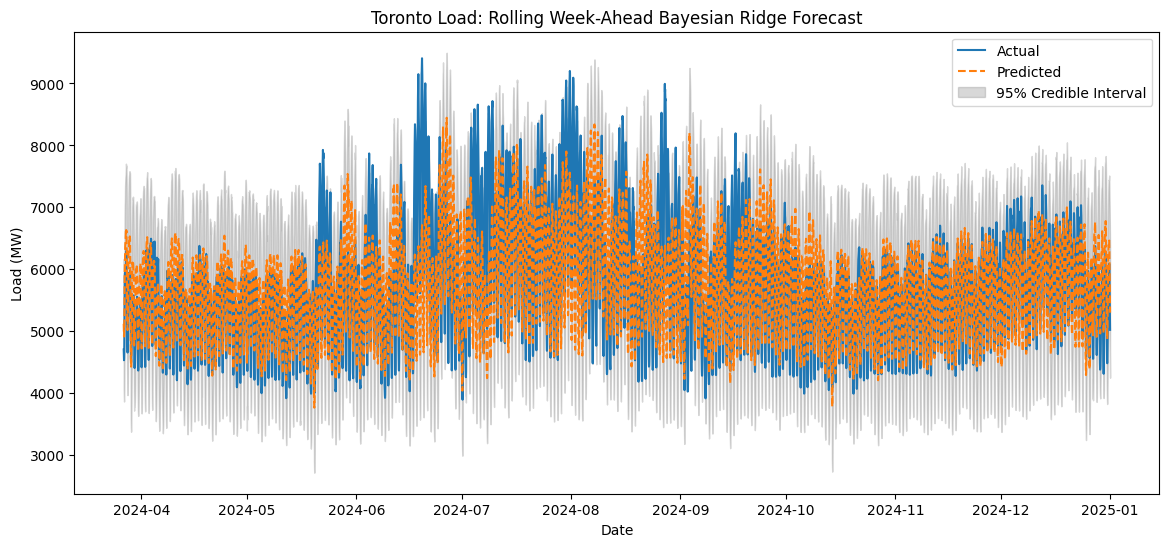

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------
# Use prepared data
# ----------------------
data = prepare_toronto_load_data(
    datamerged,
    zone='Toronto_centroid_weather',
    weather_vars=['temp_C_t2m', 'u10', 'tp'],
    extra_lags=[  
        ('Toronto', '1w_load', 168),
        ('Toronto_Darlington', '1w_price', 168)
    ],
    test_weeks=40,
    include_daily_seasonality=True
)

train = data['train']
test = data['test']
target_train = data['target_train']
target_test = data['target_test']
exog_features = data['exog_features']

# ----------------------
# Rolling week-ahead forecast with credible intervals
# ----------------------
forecast_horizon = 168  # 1 week
max_weeks = 40          # limit number of weeks to forecast

# Get full dataset for rolling window
full_data = data['toronto_data']

# Find initial training end index (start of test set)
initial_train_end = full_data.index.get_loc(test.index[0])

all_pred = []
all_actual = []
all_lower = []
all_upper = []

for week in range(max_weeks):
    # Calculate current training window end (expands each week)
    current_train_end = initial_train_end + (week * forecast_horizon)
    
    # Check if we have enough data for forecast
    forecast_end = current_train_end + forecast_horizon
    if forecast_end > len(full_data):
        break
    
    # Expand training set to include all data up to current point
    expanding_train = full_data.iloc[:current_train_end]
    expanding_target = expanding_train['Toronto'].astype(float)
    
    # Get next week's data for forecasting
    forecast_data = full_data.iloc[current_train_end:forecast_end]
    actual_values = forecast_data['Toronto'].astype(float)
    
    # Prepare feature sets
    X_train = expanding_train[exog_features]
    X_forecast = forecast_data[exog_features]
    
    # Scale features based on the EXPANDING training set
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.astype(float))
    X_forecast_scaled = scaler.transform(X_forecast.astype(float))

    # Train Bayesian Ridge on the EXPANDING training set
    model = BayesianRidge()
    model.fit(X_train_scaled, expanding_target)

    # Forecast current week with standard deviation
    pred_mean, pred_std = model.predict(X_forecast_scaled, return_std=True)

    # 95% credible interval
    lower = pred_mean - 1.96 * pred_std
    upper = pred_mean + 1.96 * pred_std

    # Store predictions, actuals, intervals
    all_pred.extend(pred_mean)
    all_actual.extend(actual_values.values)
    all_lower.extend(lower)
    all_upper.extend(upper)

# ----------------------
# Evaluate
# ----------------------
rmse = np.sqrt(mean_squared_error(all_actual, all_pred))
print(f'Rolling Bayesian Ridge RMSE: {rmse:.2f}')

# ----------------------
# Plot results with credible intervals
# ----------------------
# Reconstruct the index for the forecasted period
forecast_index = test.index[:len(all_pred)]

plt.figure(figsize=(14,6))
plt.plot(test.index, target_test, label='Actual')
plt.plot(forecast_index, all_pred, linestyle='--', label='Predicted')

plt.fill_between(
    forecast_index,
    all_lower,
    all_upper,
    color='gray',
    alpha=0.3,
    label='95% Credible Interval'
)

plt.title('Toronto Load: Rolling Week-Ahead Bayesian Ridge Forecast')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.show()


In [33]:
rmse

np.float64(602.5008319183427)

In [34]:
# show which features are most important
feature_importance = pd.Series(np.abs(model.coef_), index=exog_features)
feature_importance = feature_importance.sort_values(ascending=False)

In [35]:
feature_importance

1w_load            591.373185260
cos_day            206.333288628
sin_day            161.456880135
IsHoliday           89.213018308
sin_wk              66.999261358
cos_wk              45.370663993
temp_C_t2m_lag1w    32.917425991
1w_price            20.200548953
u10_lag1w            1.726959263
tp_lag1w             1.678063266
dtype: float64

In [ ]:
# check what's actually happening with the dates to ensure no leakage.
print(f"Test period start: {test.index[0]}")
print(f"Test period end: {test.index[-1]}")
print(f"Test set size: {len(test)} hours")
print(f"Test set size in days: {len(test) / 24} days")
print(f"Test set size in weeks: {len(test) / 168} weeks")


print(f"\nTrain period end: {train.index[-1]}")
print(f"Test period start: {test.index[0]}")
print(f"Gap between train and test: {test.index[0] - train.index[-1]}")

Test period start: 2024-03-27 00:00:00
Test period end: 2024-12-31 23:00:00
Test set size: 6720 hours
Test set size in days: 280.0 days
Test set size in weeks: 40.0 weeks

Train period end: 2024-03-26 23:00:00
Test period start: 2024-03-27 00:00:00
Gap between train and test: 0 days 01:00:00


## Prophet

In [ ]:
%pip install cmdstanpy prophet


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [28]:
import os
import sys
from contextlib import contextmanager

@contextmanager
def suppress_stdout_stderr():
    """Suppress stdout and stderr output."""
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        old_stderr = sys.stderr
        sys.stdout = devnull
        sys.stderr = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout
            sys.stderr = old_stderr


In [29]:
data['test']

,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file,temp_C_t2m,Hour_of_Day,Reference_Richview,North West_Atikokan,North West_Pineportage,North West_Thunderbay,North East_Andrews,North East_Canyon,North East_NPIroqfalls,Ottawa_TAOHSC,East_Saunders,Toronto_Darlington,Essa_Desjoachims,Bruce_BruceB,South West_GerdauCam,Niagara_BECK2,West_Greenfield,Month,Day,Weekday,IsHoliday,t,sin_wk,cos_wk,sin_day,cos_day,temp_C_t2m_lag1w,u10_lag1w,tp_lag1w,1w_load,1w_price
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-03-27 00:00:00,0,13370,611,1299,803,692,4707,816,118,2453,419,1374,13292,-78,2024,-4.708084000,0.902786250,276.713130000,278.517460000,7104.000000000,0.001618862,43.750000000,-79.250000000,Toronto_centroid_weather,5.367460000,1,14.980000000,13.030000000,12.690000000,NaN,14.000000000,14.680000000,14.260000000,14.980000000,14.680000000,14.830000000,14.830000000,14.540000000,14.980000000,14.680000000,14.980000000,3,27,2,0.000000000,54648,0.974927912,-0.222520934,-0.000000000,1.000000000,1.296600000,6.364715600,0.000006676,5081.000000000,26.940000000
2024-03-27 01:00:00,1,13430,609,1285,792,728,4588,793,125,2404,423,1458,13204,-226,2024,-5.232406600,1.627716100,277.148770000,278.683470000,0.000000000,0.000953197,43.750000000,-79.250000000,Toronto_centroid_weather,5.533470000,2,44.000000000,38.260000000,37.290000000,NaN,41.120000000,43.140000000,41.900000000,44.000000000,43.140000000,43.570000000,43.570000000,42.720000000,44.000000000,43.140000000,44.000000000,3,27,2,0.000000000,54649,0.965925826,-0.258819045,0.258819045,0.965925826,1.369960000,5.729049700,0.000002384,4945.000000000,20.860000000
2024-03-27 02:00:00,2,13433,612,1279,776,750,4533,783,129,2386,421,1514,13182,-251,2024,-4.063995400,3.130569500,277.428560000,278.920470000,0.000000000,0.000690937,43.750000000,-79.250000000,Toronto_centroid_weather,5.770470000,3,49.460000000,43.000000000,41.910000000,NaN,46.220000000,48.480000000,47.100000000,49.460000000,48.480000000,48.960000000,48.960000000,48.020000000,49.460000000,48.480000000,49.460000000,3,27,2,0.000000000,54650,0.955572806,-0.294755174,0.500000000,0.866025404,1.303280000,5.587249800,0.000001907,4859.000000000,21.060000000
2024-03-27 03:00:00,3,13451,620,1266,802,766,4570,797,129,2435,429,1574,13388,-63,2024,-2.284637500,4.672439600,277.421570000,279.067630000,0.000000000,0.001760483,43.750000000,-79.250000000,Toronto_centroid_weather,5.917630000,4,28.440000000,24.730000000,24.100000000,NaN,26.570000000,27.880000000,27.080000000,28.440000000,27.880000000,28.150000000,28.150000000,27.610000000,28.440000000,27.880000000,28.440000000,3,27,2,0.000000000,54651,0.943883330,-0.330279062,0.707106781,0.707106781,1.118300000,5.661270000,0.000001907,4873.000000000,14.550000000
2024-03-27 04:00:00,4,13636,616,1231,836,792,4774,841,128,2576,427,1663,13885,249,2024,-0.027709961,5.615463300,277.511660000,279.135740000,0.000000000,0.002178192,43.750000000,-79.250000000,Toronto_centroid_weather,5.985740000,5,8.620000000,7.500000000,7.310000000,NaN,8.060000000,8.450000000,8.210000000,8.620000000,8.450000000,8.530000000,8.530000000,8.370000000,8.620000000,8.450000000,8.620000000,3,27,2,0.000000000,54652,0.930873749,-0.365341024,0.866025404,0.500000000,1.025050000,5.582336400,0.000002861,5106.000000000,17.780000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,19,16373,612,1375,1098,1003,5807,1222,113,3133,553,1779,16695,322,2024,-5.867920000,-2.335983300,274.066530000,276.461730000,710976.000000000,0.000000000,43.750000000,-79.250000000,Toronto_centroid_weather,3.311730000,20,6.060000000,5.270000000,5.140000000,NaN,5.670000000,5.940000000,5.770000000,6.060000000,5.940000000,6.000000000,6.000000000,5.890000000,6.060

/Users/isaacwood/Documents/School/CISC 451/IESO ML Project/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:20 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:29 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:37 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] done processing
14:19:46 - cmdstanpy - INFO - Chain [1] start processing
14:19:55 - cmdstanpy - INFO - Chain [1] done processing
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:09 - cmdstanpy 

Rolling Week-Ahead RMSE for 40 weeks: 515.73


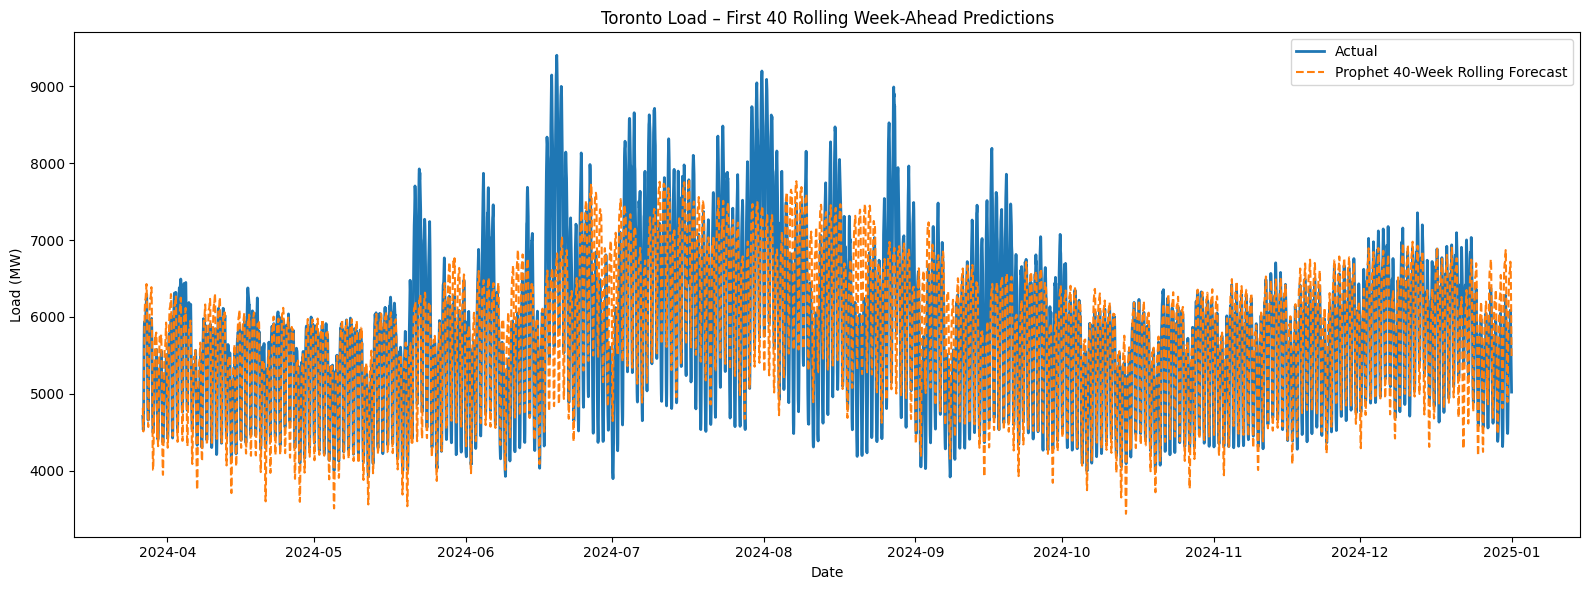

In [30]:
# --- Prophet Rolling Week-Ahead Forecasting (6 weeks only) ---
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

forecast_horizon = 168  
max_weeks = 40            

full = data["toronto_data"] ## same as in bayesian ridge regression. may change later for clarity
exog_features = data["exog_features"]

# test set boundaries from your data prep
test = data["test"]
test_start_idx = full.index.get_loc(test.index[0])
test_end_idx = full.index.get_loc(test.index[-1])

# storage
all_forecasts = []
all_timestamps = []

current_train_end = test_start_idx
week_count = 0


while current_train_end < test_end_idx and week_count < max_weeks:


    train_df = full.iloc[:current_train_end]
    future_df = full.iloc[current_train_end : current_train_end + forecast_horizon]

    if len(future_df) < forecast_horizon:
        break


    prophet_train = pd.DataFrame({
        "ds": train_df.index,
        "y": train_df["Toronto"]
    })
    
    # Filter out Fourier terms for Prophet (it has its own seasonality)
    fourier_terms = [f for f in exog_features if 'sin' in f or 'cos' in f]
    prophet_exog_features = [f for f in exog_features if f not in fourier_terms]
    
    for col in prophet_exog_features:
        prophet_train[col] = train_df[col].values

    # build Prophet model

    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=10,
        interval_width=0.95
    )

    for col in prophet_exog_features:
        model.add_regressor(col)

    model.fit(prophet_train)


    # build future_dataframe

    prophet_future = pd.DataFrame({"ds": future_df.index})
    for col in prophet_exog_features:
        prophet_future[col] = future_df[col].values


    # forecast 168 hours

    forecast = model.predict(prophet_future)

    all_forecasts.append(forecast["yhat"].values)
    all_timestamps.append(future_df.index.values)

    # Move forward one week
    current_train_end += forecast_horizon
    week_count += 1

# ---------------------------
# concatenate forecasts

preds = np.concatenate(all_forecasts)
pred_times = np.concatenate(all_timestamps)

pred_series = pd.Series(preds, index=pred_times)
actual_series = full.loc[pred_series.index, "Toronto"]


# evaluate

rmse = np.sqrt(mean_squared_error(actual_series, pred_series))
print(f"Rolling Week-Ahead RMSE for 40 weeks: {rmse:.2f}")

#plotting
plt.figure(figsize=(16, 6))
plt.plot(actual_series.index, actual_series.values, label="Actual", linewidth=2)
plt.plot(pred_series.index, pred_series.values, label="Prophet 40-Week Rolling Forecast", linestyle="--")
plt.title("Toronto Load – First 40 Rolling Week-Ahead Predictions")
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.legend()
plt.tight_layout()
plt.show()


In [254]:
print(f"Prophet RMSE for week-ahead forecast: {rmse:.2f}")

Prophet RMSE for week-ahead forecast: 511.08


ValueError: zero-dimensional arrays cannot be concatenated